In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import datetime

In [21]:
def open_and_split(fileName, starting_index):
    dummy = open(fileName, "r")
    length = len(dummy.readlines()) - 1
    dummy.close()
    
    file = open(fileName, "r")
    data = [next(file) for _ in range(length)]
    file.close()

    #divide linens and split the data
    data = [data[i].replace("\n", "") for i in range(len(data))]
    data = [data[i].split() for i in range(len(data))]
    
    #delete first row
    print(f"deleted rows: {data[0]}")
    data = data[starting_index:]
    print(type(data))
    
    return data

#function that filter year
def filter_year(DataFrame, year):
    condition = DataFrame["Year"] == year
    return DataFrame.where(condition).dropna().reset_index().drop("index", axis = 1).drop("Year", axis=1)

#convert Day-Hour to composite
def D_to_C(DataFrame):
    composite = [int(DataFrame["Day"][i]) * 24 + int(DataFrame["Hour"][i]) for i in range(DataFrame.shape[0])]
    
    new = DataFrame.copy()
    new.insert(0, "Time", composite)
    new = new.drop(["Day", "Hour"], axis = 1)
    
    return new

#DLL file with specific columns with conversion of hr:mm to hr
def dll_convert(DataFrame):
    converted = [[int(DataFrame[i][1]), int(DataFrame[i][2][:2]), float(DataFrame[i][6])] for i in range(len(DataFrame))]
    return converted

def standard_units(DataFrame):
    mean_E1 = DataFrame["B"].mean()
    std_E1 = np.std(DataFrame["B"])
    mean_DLL = DataFrame["DLL"].mean()
    std_DLL = np.std(DataFrame["DLL"])
    
    std1 = [((DataFrame["B"][i] - mean_E1) / std_E1) for i in range(len(DataFrame))]
    std2 = [((DataFrame["DLL"][i] - mean_DLL) / std_DLL) for i in range(len(DataFrame))]
    
    return pd.DataFrame({"B STD": std1, "DLL STD": std2})

def correlation_coefficient(dataframe):
    return np.mean(dataframe["B STD"] * dataframe["DLL STD"])

In [22]:
dll_row = open_and_split("DLL_zenodo_1995_T1h.txt", 21)
dll_row_selected = dll_convert(dll_row)

dll = pd.DataFrame(dll_row_selected, columns=["Day", "Hour", "DLL"])
dll = D_to_C(dll)

grouped_dll = dll.groupby("Time").mean()

deleted rows: ['****************************************************************************************']
<class 'list'>


In [23]:
B_row = open_and_split("1995 B Field E.lst", 0)

deleted rows: ['1995', '1', '0', '0', '0.19', '0.90', '-0.98', '26']
<class 'list'>


In [43]:
selected_data_row = [[int(B_row[i][1]), int(B_row[i][2]), float(B_row[i][6])] for i in range(len(B_row))]
selected_data_row

[[1, 0, -0.98],
 [1, 0, -0.98],
 [1, 0, -1.02],
 [1, 0, -0.98],
 [1, 0, -0.81],
 [1, 0, -0.78],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1,

In [44]:
selected_data = []
for i in range(len(B_row)):
    if selected_data_row[i][2] != 9999.99:
        selected_data.append(selected_data_row[i])
selected_data

[[1, 0, -0.98],
 [1, 0, -0.98],
 [1, 0, -1.02],
 [1, 0, -0.98],
 [1, 0, -0.81],
 [1, 0, -0.78],
 [1, 0, -1.94],
 [1, 0, -1.94],
 [1, 0, -2.29],
 [1, 1, -2.42],
 [1, 1, -2.52],
 [1, 1, -2.49],
 [1, 1, -1.86],
 [1, 1, -1.89],
 [1, 1, -1.85],
 [1, 1, -1.42],
 [1, 1, -1.65],
 [1, 1, -1.75],
 [1, 1, -1.85],
 [1, 1, -1.55],
 [1, 1, -1.2],
 [1, 1, -1.18],
 [1, 1, -2.02],
 [1, 1, -1.89],
 [1, 1, -2.05],
 [1, 1, -1.85],
 [1, 1, -2.04],
 [1, 1, -2.0],
 [1, 1, -0.92],
 [1, 1, -0.9],
 [1, 1, -1.06],
 [1, 1, -1.55],
 [1, 1, -1.35],
 [1, 1, -1.47],
 [1, 1, -1.37],
 [1, 1, -1.43],
 [1, 1, -1.32],
 [1, 1, -1.44],
 [1, 1, -1.41],
 [1, 1, -1.66],
 [1, 1, -1.66],
 [1, 1, -1.36],
 [1, 1, -1.54],
 [1, 1, -1.41],
 [1, 1, -1.56],
 [1, 1, -0.6],
 [1, 1, -0.64],
 [1, 1, -1.09],
 [1, 1, -0.74],
 [1, 1, -0.62],
 [1, 1, -0.18],
 [1, 1, 0.09],
 [1, 1, -0.43],
 [1, 1, 0.08],
 [1, 1, 0.38],
 [1, 1, 0.27],
 [1, 1, -0.34],
 [1, 1, -0.94],
 [1, 1, -0.91],
 [1, 1, 0.11],
 [1, 1, 0.51],
 [1, 1, 1.04],
 [1, 2, 1.01],
 [1,

In [45]:
B_data = pd.DataFrame(selected_data, columns = ["Day", "Hour", "B"])
B_data

,Day,Hour,B
0,1,0,-0.98
1,1,0,-0.98
2,1,0,-1.02
3,1,0,-0.98
4,1,0,-0.81
...,...,...,...
475462,365,23,5.36
475463,365,23,5.44
475464,365,23,5.01
475465,365,23,5.08


In [46]:
B = D_to_C(B_data).groupby("Time").mean()
B

,B
Time,
24,-1.302222
25,-1.186792
26,0.358974
27,1.375385
28,1.638857
...,...
8779,3.024500
8780,4.018000
8781,3.673667


In [47]:
combined = pd.merge(left=B, right=grouped_dll, left_on="Time", right_on="Time").reset_index()
combined

,Time,B,DLL
0,28,1.638857,-9.117692
1,30,1.801091,-9.576429
2,31,0.747759,-8.836842
3,32,-0.608000,-8.737458
4,35,2.693667,-7.578333
...,...,...,...
7862,8779,3.024500,-7.786724
7863,8780,4.018000,-8.430000
7864,8781,3.673667,-8.360167
7865,8782,1.630500,-8.144444


In [48]:
std = standard_units(combined)
std

,B STD,DLL STD
0,0.654950,-1.144192
1,0.714611,-1.788637
2,0.327250,-0.749646
3,-0.171327,-0.610028
4,1.042854,1.018341
...,...,...
7862,1.164517,0.725588
7863,1.529874,-0.178103
7864,1.403247,-0.079999
7865,0.651876,0.223053


In [49]:
val = correlation_coefficient(std)
val

-0.1729532436163167

Text(0.5, 0.98, 'B vs DLL')

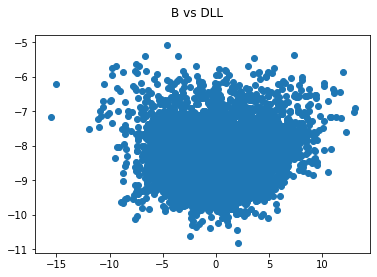

In [41]:
plt.scatter("B", "DLL", data = combined)
plt.suptitle("B vs DLL")

Text(0.5, 0.98, 'B STD vs DLL STD')

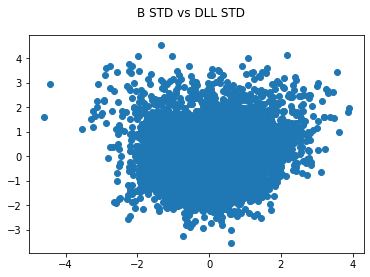

In [42]:
plt.scatter("B STD", "DLL STD", data=std)
plt.suptitle("B STD vs DLL STD")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=28a83fbe-9ed8-4ad0-ab71-9db262ace005' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>